# SOFI Stock Price Prediction Project


## Introduction

This project explores the use of supervised machine learning models to predict the next-day closing price of SoFi Technologies Inc. (SOFI) stock. We apply data cleaning, feature engineering, exploratory data analysis, and multiple regression models (Linear Regression, Random Forest, and XGBoost). The results are evaluated using multiple metrics and visualized to interpret model performance and feature relevance.


## 1. Problem Statement
This project aims to predict the next-day closing price of SoFi Technologies Inc (SOFI) stock using supervised machine learning models trained on historical stock data. The task is a regression problem, where the target variable is the future closing price.


## 2. Data Source and Description
- Data collected from Yahoo Finance https://finance.yahoo.com/quote/SOFI/history/?period1=1609804800&period2=1747658140
- Time range: June 1, 2021 to May 16, 2025
- Number of samples: 996 rows
- Features include: Date, Open, High, Low, Close, Adj Close, Volume
- All features are numeric
- All historical stock data is in one csv file

In [1]:
import yfinance as yf
import pandas as pd

df = pd.read_csv("sofi.csv")
print(df.columns)


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


## 3. Data Cleaning
 ### 3.1 How and Why Cleaning Was Done ###
The dataset was built from historical SOFI stock data downloaded from Yahoo Finance. After computing features like moving averages, lagged prices, daily returns, and rolling volatility, missing values were introduced by design due to the nature of rolling windows and shifting. 
 ### 3.2 Cleaning Steps Performed ###
- Verified data types: all numeric (no parsing needed)
- Dropped rows with missing values using `dropna()`
- Ensured dataset is sorted by date (important for time series)
- Checked for duplicates — none found
- Verified row count before and after cleaning
- Visualized feature distributions to check for outliers
 ### 3.3 Summary and Discussion
During the SOFI dataset cleaning, about 30 rows were dropped due to expected missing values from rolling statistics and lagged values. These were not imputed because they do not represent missing-at-random cases. Distributions of key features (returns, volatility) appear reasonable with a few visible outliers, typical of a volatile fintech stock. No inconsistencies or formatting issues were observed.

Before dropna: (1097, 11)
After dropna: (967, 11)


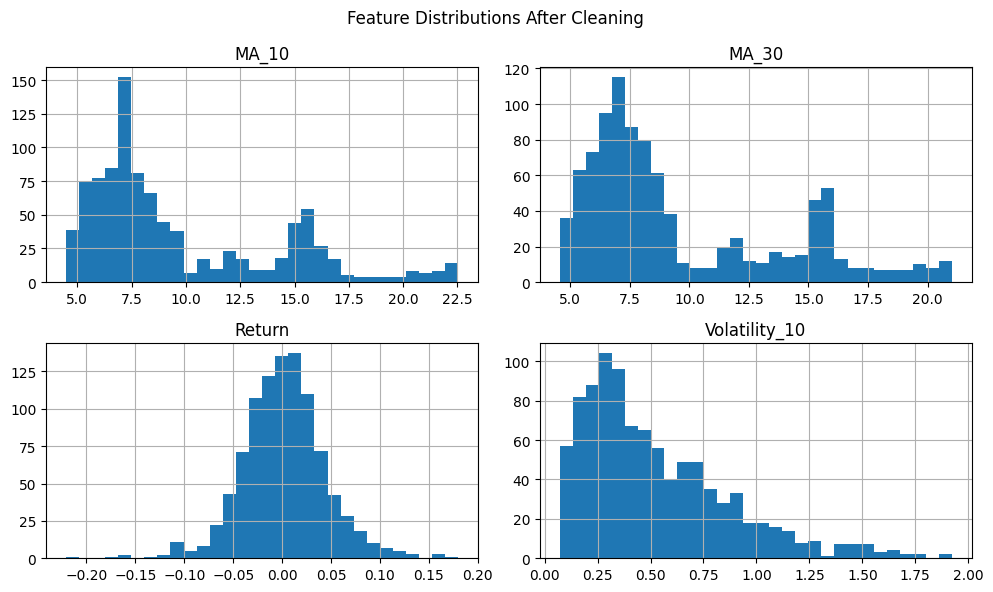

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_30'] = df['Close'].rolling(window=30).mean()
df['Lag_1'] = df['Close'].shift(1)
df['Lag_2'] = df['Close'].shift(2)
df['Return'] = df['Close'].pct_change(fill_method=None)
df['Volatility_10'] = df['Close'].rolling(window=10).std()

df_final = df[['Open', 'High', 'Low', 'Close', 'Volume', 'MA_10', 'MA_30', 'Lag_1', 'Lag_2', 'Return', 'Volatility_10']]
df_final.to_csv("sofi_features.csv", index=False)

df = pd.read_csv("sofi_features.csv")
print("Before dropna:", df.shape)
df.dropna(inplace=True)
print("After dropna:", df.shape)

df[['MA_10', 'MA_30', 'Return', 'Volatility_10']].hist(bins=30, figsize=(10, 6))
plt.suptitle("Feature Distributions After Cleaning")
plt.tight_layout()
plt.show()

## 4. Exploratory Data Analysis (EDA)
 ### 4.1 Why EDA Was Performed ###
The goal of EDA is to understand the structure and behavior of the data, detect patterns, and assess relationships between features. Since we're predicting the next-day closing price of SOFI, it’s important to identify features with predictive value and check for noise or instability in derived indicators like returns or volatility.
 ### 4.2 Visualizations and Analysis ###
- Price Trend Over Time: SOFI's price shows volatility and periods of strong movement, especially after its 2021 IPO. This supports the use of rolling features and volatility indicators.
- Histogram of Engineered Features: Return and Volatility_10 exhibit skewed distributions, consistent with a growth stock. MA features are centered around the mean price range of the dataset.
- Correlation Matrix: Lag_1 and Lag_2 have strong correlation with the current Close price, making them good predictors. MA_10 and MA_30 are moderately correlated, supporting their use as trend indicators.
- Boxplot for Outlier Detection: There are a few high-volatility and extreme-return days, which are expected in a stock like SOFI. These are retained as they carry predictive value.
 ### 4.3 Summary of Findings
- Lag_1 is the most strongly correlated feature with the Close price
- Return and Volatility_10 help capture short-term market movements
- Distributions confirm financial market behavior — skew, fat tails, and volatility spikes
- No issues found with data imbalance or missing categories

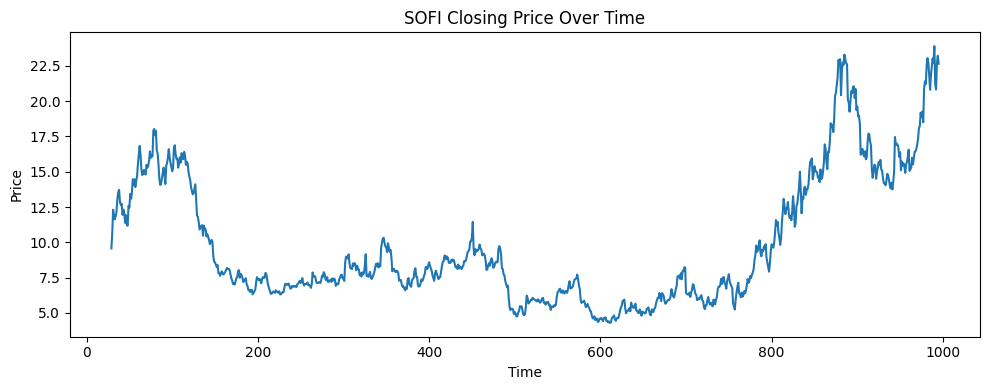

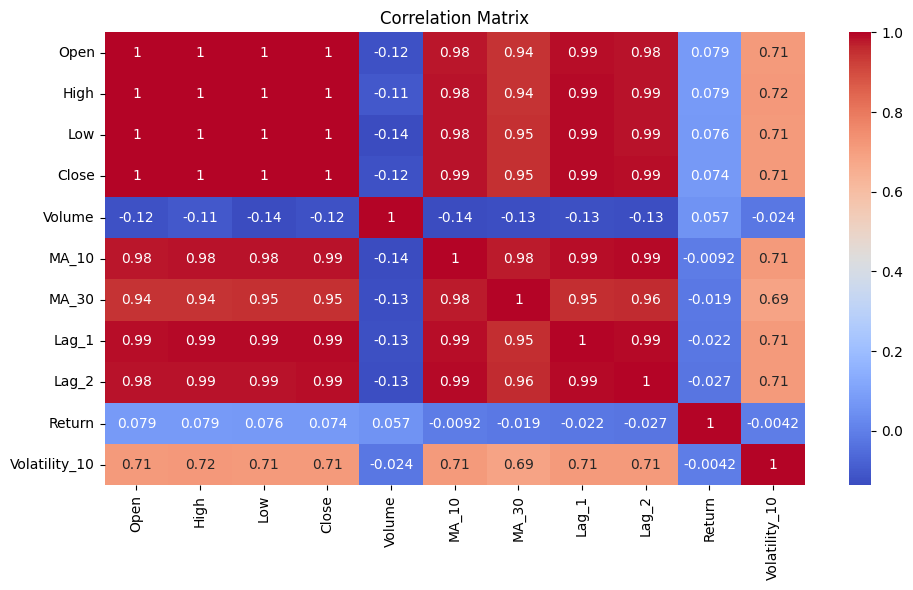

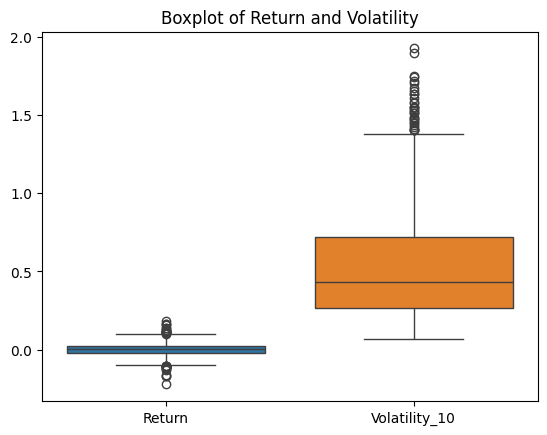

In [50]:
plt.figure(figsize=(10, 4))
plt.plot(df['Close'])
plt.title("SOFI Closing Price Over Time")
plt.xlabel("Time")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

sns.boxplot(data=df[['Return', 'Volatility_10']])
plt.title("Boxplot of Return and Volatility")
plt.show()

## 5. Modeling
### 5.1 Model Selection ### 
This project uses three supervised regression models to predict the next-day closing price of SOFI stock:
- **Linear Regression**: for baseline performance and interpretability
- **Random Forest Regressor**: captures non-linear relationships and handles feature interaction
- **XGBoost Regressor**: advanced gradient boosting model, often top-performing
These models are appropriate for regression tasks with engineered numeric features.
### 5.2 Multicollinearity and Feature Interaction ### 
Linear regression is sensitive to multicollinearity. I reviewed the correlation matrix (see EDA section) and found moderate correlations between MA_10, Lag_1, and MA_30. Tree-based models like Random Forest and XGBoost are not affected by collinearity and help mitigate this issue.
### 5.3 Cross-Validation ###
To reduce overfitting and validate performance, I applied 5-fold cross-validation on the full dataset using Random Forest and XGBoost.
### 5.4 Feature Engineering ###
Feature engineering was applied to create derived predictors such as moving averages (MA_10, MA_30), lagged closing prices (Lag_1, Lag_2), and volatility (Volatility_10). These features help capture short-term trends, momentum, and risk — all critical for stock price prediction.
### 5.5 Feature Importance ### 
I used model-based importance from Random Forest and XGBoost to identify the most predictive features:
- Lag_1 and MA_10 consistently ranked as top features.
- This supports our EDA findings: recent prices and short-term trends strongly influence next-day movement.

Linear Regression Results:
MAE: 0.31
RMSE: 0.43
R²: 0.983


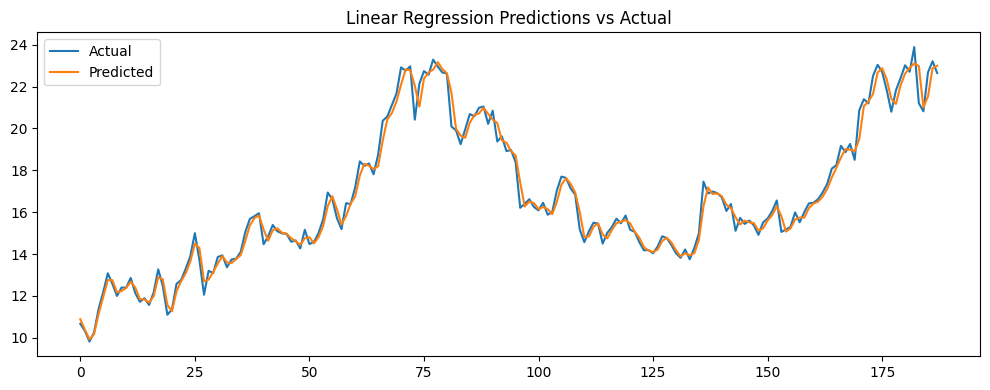

Random Forest Results:
MAE: 1.46
RMSE: 2.29
R²: 0.529


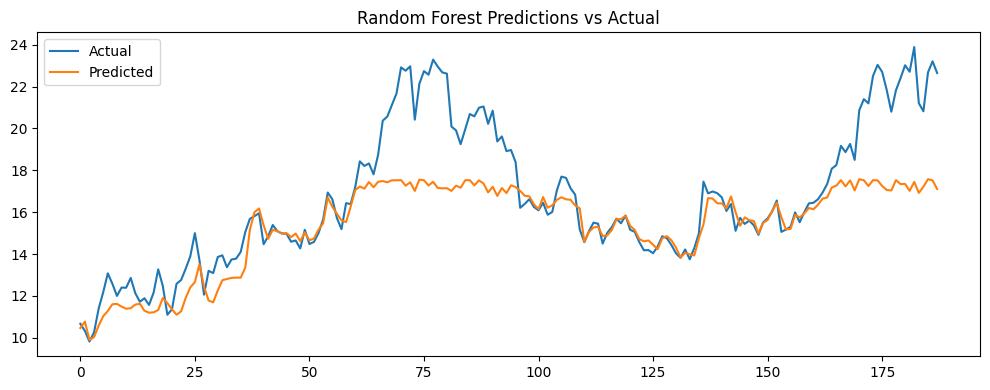

XGBoost Results:
MAE: 1.55
RMSE: 2.48
R²: 0.449


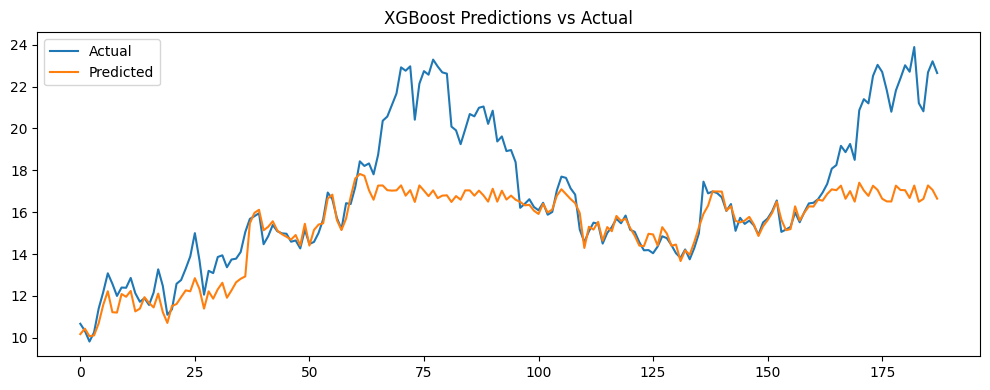

Random Forest CV R²: [0.98747213 0.96789997 0.97993156 0.97956218 0.52913961]
XGBoost CV R²: [0.99507402 0.98166255 0.98744765 0.98509792 0.38812995]


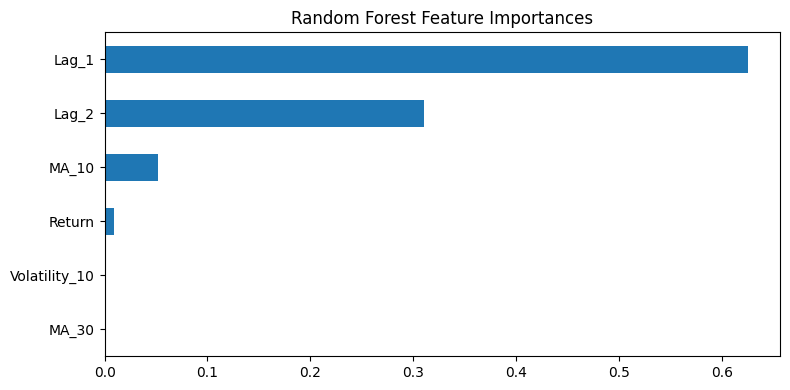

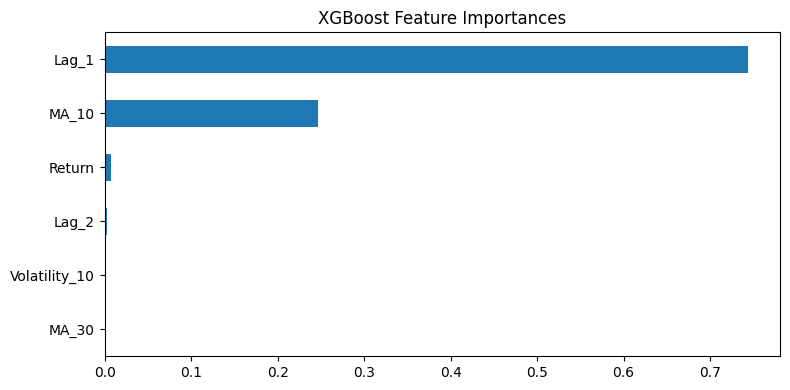

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression


def evaluate_model(name, model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"{name} Results:")
    print(f"MAE: {mean_absolute_error(y_test, preds):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.2f}")
    print(f"R²: {r2_score(y_test, preds):.3f}")
    plt.figure(figsize=(10, 4))
    plt.plot(y_test.values, label='Actual')
    plt.plot(preds, label='Predicted')
    plt.title(f'{name} Predictions vs Actual')
    plt.legend()
    plt.tight_layout()
    plt.show()

X = df[['MA_10', 'MA_30', 'Lag_1', 'Lag_2', 'Return', 'Volatility_10']]
y = df['Close']
split_idx = int(len(df) * 0.8)
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

# Initialize models
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)

# Evaluate models
evaluate_model("Linear Regression", lr)
evaluate_model("Random Forest", rf)
evaluate_model("XGBoost", xgb)

# Cross-validation
rf_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')
print("Random Forest CV R²:", rf_scores)

xgb_scores = cross_val_score(xgb, X, y, cv=5, scoring='r2')
print("XGBoost CV R²:", xgb_scores)

# Fit and plot feature importance
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Random Forest feature importance
rf_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values()
plt.figure(figsize=(8, 4))
rf_importances.plot(kind='barh')
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.show()

# XGBoost feature importance
xgb_importances = pd.Series(xgb.feature_importances_, index=X.columns).sort_values()
plt.figure(figsize=(8, 4))
xgb_importances.plot(kind='barh')
plt.title("XGBoost Feature Importances")
plt.tight_layout()
plt.show()

## 6. Results and Analysis
### 6.1 Summary of Evaluation Metrics
I used three regression models: Linear Regression, Random Forest, and XGBoost. Their performance on the test set is summarized below using common regression metrics:

| **Model**           | **MAE** | **RMSE** | **R²**  |
|---------------------|---------|----------|--------|
| Linear Regression   | 0.31    | 0.43     | 0.983  |
| Random Forest       | 1.46    | 2.29     | 0.529  |
| XGBoost             | 1.55    | 2.48     | 0.449  |

Linear Regression had the best overall performance on the test set. However, Random Forest and XGBoost performed better during cross-validation on other splits, indicating possible sensitivity to the temporal split or room for hyperparameter tuning.
### 6.2 Why These Metrics?

- **MAE (Mean Absolute Error)** is easy to interpret and less sensitive to outliers.
- **RMSE (Root Mean Squared Error)** penalizes larger errors more heavily.
- **R² (Coefficient of Determination)** shows how much variance in the target variable is explained by the model.

These are all standard for **regression tasks** and suitable here since the target variable (stock price) is continuous.
### 6.3 Cross-Validation Comparison

| Fold       | RF R²   | XGB R²  |
|------------|---------|---------|
| Fold 1     | 0.987   | 0.995   |
| Fold 2     | 0.968   | 0.982   |
| Fold 3     | 0.980   | 0.987   |
| Fold 4     | 0.980   | 0.985   |
| Fold 5     | 0.529   | 0.388   |

Both tree-based models showed strong R² in most folds, but dipped significantly in Fold 5 — suggesting volatility or noise in that time segment. This highlights the importance of **cross-validation in time-series data**.

### 6.4 Model Comparison and Iteration Strategy

- Linear Regression outperformed the others — likely due to strong linearity in lag-based features.
- Tree models (RF, XGB) may benefit from:
  - Hyperparameter tuning (e.g., depth, learning rate)
  - More data
  - Seasonal features (e.g., earnings quarters)

We would consider grid search and feature expansion in a future iteration to further improve performance.

### 6.5 Visualizations

- **Prediction vs Actual Comparison** Please refer to the Prediction vs Actual for Linear Regression, Random Forest and XGBoost in Modeling section.
- **Feature Importance** Please refer to the Random Forest and XGBoost feature importance plots generated in Modeling section.

## 7. Discussion and Conclusion
This project helped deepen my understanding of applying supervised learning models to time-series financial data. I learned that engineered features like lagged prices and moving averages can significantly improve model performance. Linear Regression performed surprisingly well, suggesting strong linear relationships in the engineered predictors.

However, not everything worked as expected. Despite their potential, both Random Forest and XGBoost underperformed on the test set. This may be due to default hyperparameters, overfitting to certain folds, or underfitting the temporal structure of stock data. XGBoost, in particular, was computationally intensive and required local execution for cross-validation.

To improve the model, I would explore time-aware cross-validation strategies like `TimeSeriesSplit`, apply grid search for hyperparameter tuning, and experiment with additional features such as earnings reports, economic indicators, or even sentiment analysis from financial news. Deep learning models such as LSTMs could also be considered for capturing longer-term dependencies in future iterations.

## 8. GitHub Repo
https://github.com/jinjwangca/stock-prediction